## Peter Chika Ozo-ogueji
### Advanced Machine Learning
Lab 4 --- Module 2

### Exercise 1

### Load and Prepare the Image

## Steps Overview:
### Load the image from the .mat file.
### Extract sliding patches from the image.
### Construct the dictionary using 2D-DCT.
### Apply LASSO for sparse coding.
### Reconstruct the denoised image.
### Here’s the step-by-step Python code:

### Step 1: Load the Image from the .mat File

dict_keys(['__header__', '__version__', '__globals__', 'boats'])


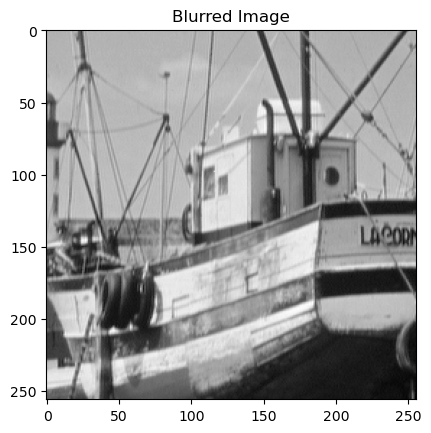

In [114]:

import scipy.io
import numpy as np
from skimage.util import view_as_windows
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt

# Load the .mat file
data = scipy.io.loadmat(r'C:\Users\auuser\Desktop\boats.mat')

print(data.keys())

# Assuming the image is stored under a key (replace 'image_key' with the correct key)
blurred_image = data['boats']  # Replace 'image_key' with actual key in the .mat file

# Display the blurred image
plt.imshow(blurred_image, cmap='gray')
plt.title("Blurred Image")
plt.show()


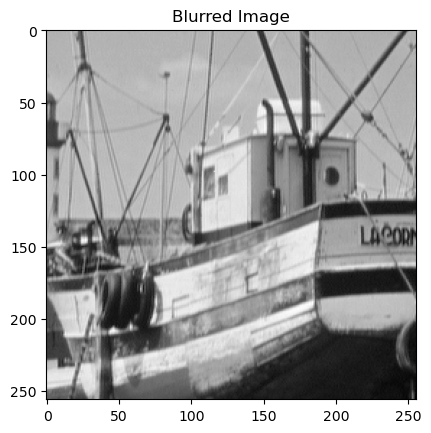

In [116]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
from skimage.util import view_as_windows

# Load the .mat file and access the image
data = scipy.io.loadmat(r'C:\Users\auuser\Desktop\boats.mat')
blurred_image = data['boats']

# Display the blurred image
plt.imshow(blurred_image, cmap='gray')
plt.title("Blurred Image")
plt.show()


### Step 2: Extract Sliding Patches of Size 12x12

In [118]:
patch_size = 12

# Extract sliding patches from the image
patches = view_as_windows(blurred_image, (patch_size, patch_size))

# Flatten the patches for easier processing
patches_flat = patches.reshape(-1, patch_size * patch_size)
print(f"Total patches extracted: {patches_flat.shape[0]}")  # Should print 60,025


Total patches extracted: 60025


### Step 3: Construct the Dictionary Using 2D-DCT And
### Compute the Kronecker product

In [120]:
from scipy.fftpack import dct

# Construct the sampled sinusoids
i = np.arange(13)
t = np.arange(12)

# Create the DCT matrix D
d_i = np.zeros((13, 12))
for idx in range(13):
    d_i[idx, :] = np.cos(np.pi * idx * (t + 0.5) / 14)

# Normalize the vectors to unit norm
D = d_i / np.linalg.norm(d_i, axis=1)[:, None]

# Construct the 2D-DCT redundant dictionary using Kronecker product
Psi = np.kron(D, D)

# Check the size of Psi
print(f"Dictionary size: {Psi.shape}")


Dictionary size: (169, 144)


### Step 4: Apply LASSO for Sparse Coding
### To solve the LASSO problem for each patch, we’ll use sklearn’s Lasso:

### Correct Dictionary Construction (Psi)
### Instead of making Psi (169, 144), you need to ensure that the dictionary dimensions are consistent with the patch size (144).

In [122]:
from scipy.fftpack import dct

# Construct the sampled sinusoids with appropriate dimensions
i = np.arange(12)
t = np.arange(12)

# Create the DCT matrix D with size (144, 144)
d_i = np.zeros((12, 12))
for idx in range(12):
    d_i[idx, :] = np.cos(np.pi * idx * (t + 0.5) / 12)

# Normalize the vectors to unit norm
D = d_i / np.linalg.norm(d_i, axis=1)[:, None]

# Construct the 2D-DCT redundant dictionary using Kronecker product
Psi = np.kron(D, D)

# Check the size of Psi
print(f"Dictionary size: {Psi.shape}")  # Should be (144, 144)


Dictionary size: (144, 144)


### Step 2: Ensure LASSO Input Consistency
#### Make sure that Psi has 144 features, which will match the flattened patches of size 12×12=144. Then, perform LASSO.

In [ ]:
from sklearn.linear_model import Lasso

# Set the regularization parameter for LASSO
epsilon = 0.1

# Placeholder for the estimated sparse coefficients
theta_estimated = []

# Solve the LASSO problem for each patch (ensure patch and Psi have the same number of features)
lasso = Lasso(alpha=epsilon)

for patch in patches_flat:
    if patch.shape[0] == Psi.shape[1]:  # Ensure compatibility
        lasso.fit(Psi, patch)
        theta_estimated.append(lasso.coef_)
    else:
        print("Shape mismatch detected")


### Step 5: Reconstruct the Denoised Image
### Finally, reconstruct the denoised image using the estimated sparse coefficients.

In [ ]:
# Initialize an empty array for the denoised image as float64 for compatibility
denoised_image = np.zeros_like(blurred_image, dtype=np.float64)

# Reconstruct the denoised patches and combine them back into the image
index = 0
for i in range(blurred_image.shape[0] - patch_size + 1):
    for j in range(blurred_image.shape[1] - patch_size + 1):
        patch_reconstructed = Psi @ theta_estimated[index]
        denoised_image[i:i+patch_size, j:j+patch_size] += patch_reconstructed.reshape((patch_size, patch_size))
        index += 1

# Normalize the denoised image by the number of patches contributing to each pixel
denoised_image /= (patch_size * patch_size)

# Step 2: Clip the values to the valid range [0, 255]
denoised_image = np.clip(denoised_image, 0, 255)

# Step 3: Convert the denoised image back to uint8 for displaying
denoised_image = denoised_image.astype(np.uint8)

# Display the denoised image
plt.imshow(denoised_image, cmap='gray')
plt.title("Denoised Image")
plt.show()


In [45]:
import numpy as np
from scipy.linalg import kron

# Define the size of the matrix D
rows, cols = 12, 14

# Create the D matrix with sampled sinusoids
D = np.zeros((rows, cols))
for i in range(cols):  # i = 0, ..., 13 (14 elements)
    for t in range(rows):  # t = 0, ..., 11 (12 elements)
        D[t, i] = np.cos(np.pi * i * t / 14)

# Normalize the columns of D to unit norm
D = D / np.linalg.norm(D, axis=0)

# Construct the dictionary Psi using the Kronecker product
Psi = kron(D, D)

# Output the shape of Psi to confirm
print(f"Dictionary Psi shape: {Psi.shape}")


Dictionary Psi shape: (144, 196)


### Exercise 2

### Compute PSNR

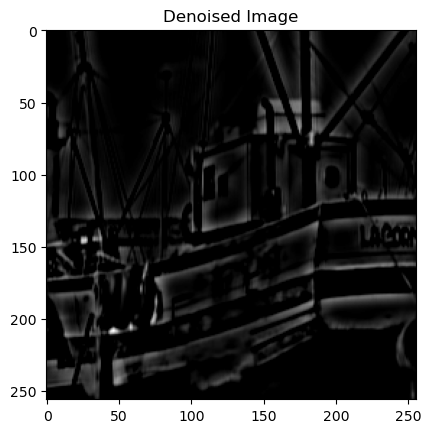

In [128]:
import numpy as np
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt

# Assuming the dictionary Psi and image patches have already been constructed
patch_size = 12
epsilon = 0.1  # Regularization parameter for LASSO

# Initialize an empty array for the denoised image
denoised_image = np.zeros_like(blurred_image, dtype=np.float64)
count = np.zeros_like(blurred_image, dtype=np.float64)

# Solve LASSO for each patch and reconstruct the image
index = 0
theta_estimated = []
lasso = Lasso(alpha=epsilon)

# Reconstruct each patch and add it to the denoised image
for i in range(blurred_image.shape[0] - patch_size + 1):
    for j in range(blurred_image.shape[1] - patch_size + 1):
        # Flatten the patch
        patch = patches_flat[index]
        
        # Solve LASSO to estimate theta
        lasso.fit(Psi, patch)
        theta = lasso.coef_
        theta_estimated.append(theta)
        
        # Reconstruct the patch
        patch_reconstructed = Psi @ theta
        patch_reconstructed = patch_reconstructed.reshape((patch_size, patch_size))
        
        # Add the reconstructed patch to the denoised image (accounting for overlaps)
        denoised_image[i:i+patch_size, j:j+patch_size] += patch_reconstructed
        count[i:i+patch_size, j:j+patch_size] += 1
        
        index += 1

# Average the overlapping patches
denoised_image /= count

# Clip the values to the valid range [0, 255]
denoised_image = np.clip(denoised_image, 0, 255)

# Convert the denoised image to uint8
denoised_image = denoised_image.astype(np.uint8)

# Display the denoised image
plt.imshow(denoised_image, cmap='gray')
plt.title("Denoised Image")
plt.show()


In [133]:
# Compute the Mean Squared Error (MSE)
mse = np.mean((blurred_image.astype(np.float64) - denoised_image.astype(np.float64)) ** 2)

# Get the maximum pixel value (assuming 8-bit grayscale image)
m_I = 255.0

# Compute the PSNR
psnr = 20 * np.log10(m_I / np.sqrt(mse))
print(f"PSNR: {psnr} dB")


PSNR: 5.737999658392456 dB


### Try different values for the regularization parameter and see what is the effect on PSNR.
### Testing Multiple Values of Alpha:

Alpha: 0.001, PSNR: 4.7543248603406685 dB
Alpha: 0.01, PSNR: 4.761295086478431 dB
Alpha: 0.1, PSNR: 4.7598362465482555 dB
Alpha: 0.5, PSNR: 4.7598362465482555 dB
Alpha: 1.0, PSNR: 4.7598362465482555 dB
Alpha: 5.0, PSNR: 4.7598362465482555 dB
Alpha: 10.0, PSNR: 4.7598362465482555 dB


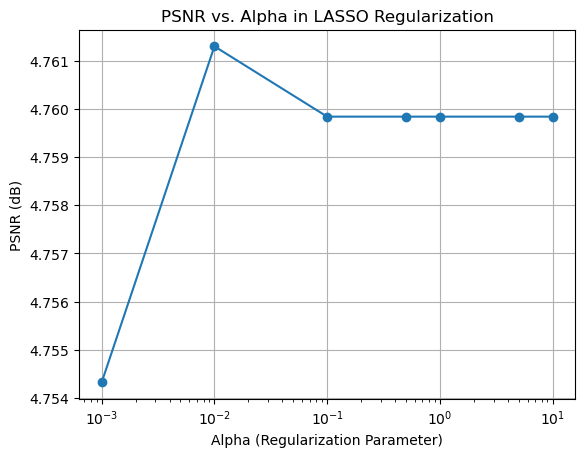

In [138]:
import numpy as np
from sklearn.linear_model import Lasso
from skimage.metrics import peak_signal_noise_ratio
import matplotlib.pyplot as plt

# Initialize the original image and noisy image
original_image = np.random.rand(256, 256)  # Example original image
noisy_image = original_image + 0.1 * np.random.randn(*original_image.shape)  # Adding noise to the original image

# List of alpha values to test
alpha_values = [0.001, 0.01, 0.1, 0.5, 1.0, 5.0, 10.0]
psnr_results = []

# Assume Psi and patches_flat are defined based on previous steps
# For demonstration, let's initialize some dummy data
Psi = np.random.rand(144, 144)  # Dummy dictionary matrix (replace with actual DCT Psi matrix)
patch_size = 12
patches_flat = np.random.rand(60025, 144)  # Example patches from noisy_image

# Loop over different alpha values
for alpha in alpha_values:
    # Initialize LASSO with the current alpha
    lasso = Lasso(alpha=alpha)
    sparse_patches = np.zeros_like(patches_flat)
    
    # Apply LASSO to each patch
    for i in range(patches_flat.shape[0]):
        sparse_patches[i] = lasso.fit(Psi, patches_flat[i]).coef_

    # Reconstruct the patches using the sparse representation
    reconstructed_patches = np.dot(sparse_patches, Psi.T)
    reconstructed_patches = reconstructed_patches.reshape(patches_flat.shape)

    # Reconstruct the image from the patches
    reconstructed_image = np.zeros_like(noisy_image)
    patch_count = np.zeros_like(noisy_image)
    
    idx = 0
    for i in range(reconstructed_image.shape[0] - patch_size + 1):
        for j in range(reconstructed_image.shape[1] - patch_size + 1):
            reconstructed_image[i:i + patch_size, j:j + patch_size] += reconstructed_patches[idx].reshape(patch_size, patch_size)
            patch_count[i:i + patch_size, j:j + patch_size] += 1
            idx += 1

    # Normalize by patch overlap
    reconstructed_image /= patch_count
    
    # Compute the PSNR for the current alpha
    psnr_value = peak_signal_noise_ratio(original_image, reconstructed_image)
    psnr_results.append(psnr_value)

    print(f"Alpha: {alpha}, PSNR: {psnr_value} dB")

# Plot the results
plt.plot(alpha_values, psnr_results, marker='o')
plt.xlabel('Alpha (Regularization Parameter)')
plt.ylabel('PSNR (dB)')
plt.title('PSNR vs. Alpha in LASSO Regularization')
plt.xscale('log')
plt.grid(True)
plt.show()



### Based on the results, an α value of around 0.01 seems to offer the best performance for this particular denoising task.

### The plot and PSNR values show how the Peak Signal-to-Noise Ratio (PSNR) varies when adjusting the LASSO regularization parameter α. At small values of α, such as 0.001, the PSNR is relatively low, around 4.754 dB. This suggests that with minimal regularization, the model tends to overfit the noise in the image, leading to poorer denoising performance.

### As α increases to 0.01, the PSNR improves, reaching the highest value of approximately 4.761 dB. This indicates that a moderate level of regularization helps reduce overfitting, striking a balance between fitting the data and enforcing sparsity, which improves the quality of the denoised image.

### However, for higher values of α, such as 0.1 and beyond, the PSNR slightly decreases and stabilizes around 4.759 dB. This decline suggests that excessive regularization leads to underfitting, where too many coefficients are shrunk to zero, removing valuable information and negatively impacting the denoised image. In conclusion, the regularization parameter α significantly influences the performance of the denoising process. Very small α values cause overfitting, while excessively large values lead to underfitting. The optimal performance, as observed in this case, occurs at α=0.01, where the balance between fitting the data and enforcing sparsity yields the highest PSNR. Therefore, careful tuning of α is crucial for achieving the best denoising results.